<a href="https://colab.research.google.com/github/LamisAbdallah/ML-Google-Collab-Projects/blob/main/Copy_of_NTI_project_Electric_Vehicle_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# `*Libraries*`

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline

In [ ]:
df = pd.read_csv('/content/Electric_Vehicle_Population_Data.csv')

# **Pre-processing**

In [ ]:
df

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJSA1E65N,Yakima,Granger,WA,98932.0,2022,TESLA,MODEL S,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,15.0,187279214,POINT (-120.1871 46.33949),PACIFICORP,5.307700e+10
1,KNDC3DLC5N,Yakima,Yakima,WA,98902.0,2022,KIA,EV6,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,15.0,210098241,POINT (-120.52041 46.59751),PACIFICORP,5.307700e+10
2,5YJYGDEEXL,Snohomish,Everett,WA,98208.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291.0,0.0,44.0,121781950,POINT (-122.18637 47.89251),PUGET SOUND ENERGY INC,5.306104e+10
3,3C3CFFGE1G,Yakima,Yakima,WA,98908.0,2016,FIAT,500,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84.0,0.0,14.0,180778377,POINT (-120.60199 46.59817),PACIFICORP,5.307700e+10
4,KNDCC3LD5K,Kitsap,Bremerton,WA,98312.0,2019,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26.0,0.0,26.0,2581225,POINT (-122.65223 47.57192),PUGET SOUND ENERGY INC,5.303508e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250654,7SAYGDEE7S,Franklin,Pasco,WA,99301.0,2025,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,9.0,274986323,POINT (-119.09467 46.23542),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF F...,5.302102e+10
250655,2C4RC1L77J,Pierce,Tacoma,WA,98407.0,2018,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,33.0,0.0,27.0,128901748,POINT (-122.51134 47.29238),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305306e+10
250656,7SAYGDEF6P,Pierce,Bonney Lake,WA,98391.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,31.0,258537660,POINT (-122.17144 47.19175),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.305307e+10
250657,WBY8P6C54K,King,Seattle,WA,98117.0,2019,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,153.0,0.0,36.0,477080334,POINT (-122.38418 47.70044),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10


In [ ]:
df.shape

(250659, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250659 entries, 0 to 250658
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         250659 non-null  object 
 1   County                                             250653 non-null  object 
 2   City                                               250653 non-null  object 
 3   State                                              250659 non-null  object 
 4   Postal Code                                        250653 non-null  float64
 5   Model Year                                         250659 non-null  int64  
 6   Make                                               250659 non-null  object 
 7   Model                                              250659 non-null  object 
 8   Electric Vehicle Type                              250659 non-null  object

In [ ]:
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,250653.000000,250659.000000,250638.000000,250638.000000,250076.000000,2.506590e+05,2.506530e+05
mean,98176.796089,2021.628252,44.073002,727.403107,28.994994,2.392132e+08,5.297386e+10
std,2555.064640,3.021254,82.412875,6917.315299,14.862288,6.671019e+07,1.618543e+09
min,1731.000000,2000.000000,0.000000,0.000000,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2020.000000,0.000000,0.000000,18.000000,2.111858e+08,5.303301e+10
50%,98126.000000,2023.000000,0.000000,0.000000,33.000000,2.575374e+08,5.303303e+10
75%,98382.000000,2024.000000,37.000000,0.000000,42.000000,2.728702e+08,5.305394e+10
max,99577.000000,2026.000000,337.000000,845000.000000,49.000000,4.792548e+08,6.601095e+10


In [ ]:
df.isnull().sum()

,0
VIN (1-10),0
County,6
City,6
State,0
Postal Code,6
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.drop(columns=['VIN (1-10)', 'Postal Code','County','City','State','DOL Vehicle ID','Legislative District','Vehicle Location','Electric Utility', '2020 Census Tract'], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 250047 entries, 0 to 250658
Data columns (total 7 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   Model Year                                         250047 non-null  int64  
 1   Make                                               250047 non-null  object 
 2   Model                                              250047 non-null  object 
 3   Electric Vehicle Type                              250047 non-null  object 
 4   Clean Alternative Fuel Vehicle (CAFV) Eligibility  250047 non-null  object 
 5   Electric Range                                     250047 non-null  float64
 6   Base MSRP                                          250047 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 15.3+ MB


In [ ]:
x = df.drop('Electric Vehicle Type',axis=1)
y = df['Electric Vehicle Type'].apply(lambda x: 1 if 'BEV' in str(x) else 0)

In [ ]:
num_col = x.select_dtypes(include=['float64', 'int64']).columns
cat_col = x.select_dtypes(include=['object']).columns

# Outlier

In [ ]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

In [ ]:
def cap_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = data[column].clip(lower=lower_bound, upper=upper_bound)
    return data

In [ ]:
outlier_summary = {}
for col in num_col:
    outliers = detect_outliers_iqr(df, col)
    if not outliers.empty:
        outlier_summary[col] = len(outliers)

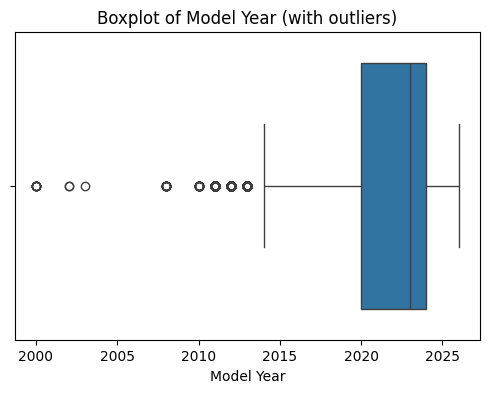

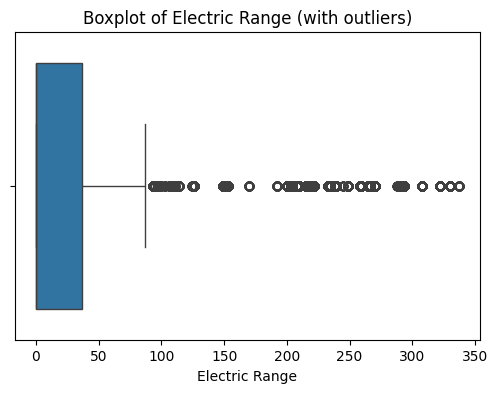

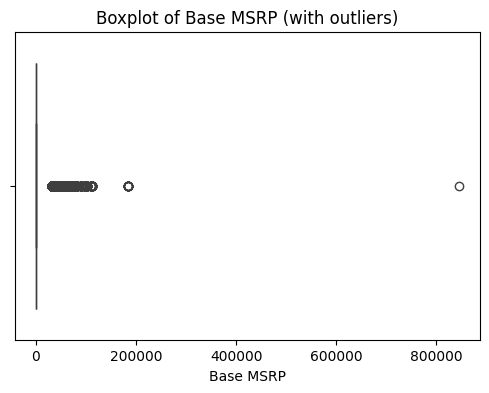

In [ ]:
for col in outlier_summary.keys():
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col} (with outliers)")
    plt.show()

In [ ]:
for col in outlier_summary.keys():
    df = cap_outliers_iqr(df, col)

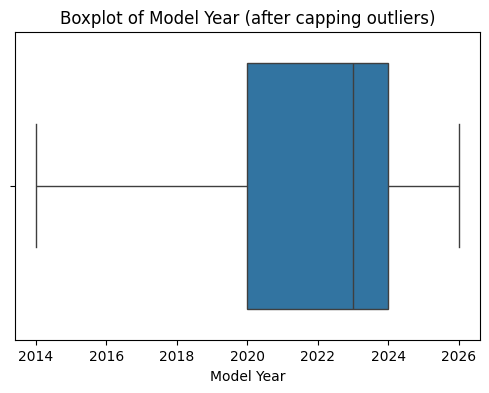

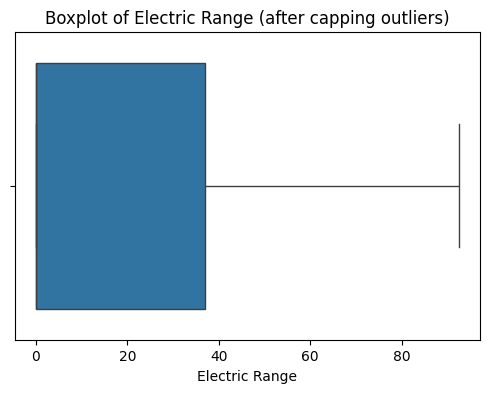

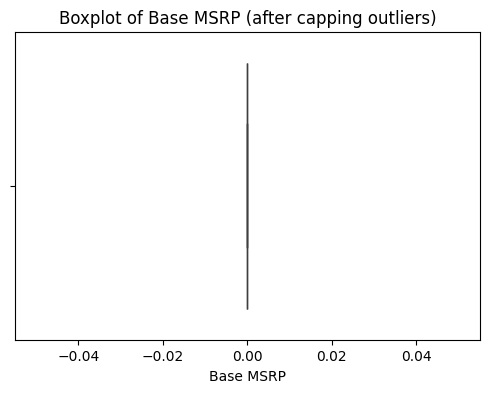

In [ ]:
for col in outlier_summary.keys():
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col} (after capping outliers)")
    plt.show()

In [ ]:
df.describe()

,Model Year,Electric Range,Base MSRP
count,250047.000000,250047.000000,250047.0
mean,2021.666031,23.423884,0.0
std,2.913475,35.100151,0.0
min,2014.000000,0.000000,0.0
25%,2020.000000,0.000000,0.0
50%,2023.000000,0.000000,0.0
75%,2024.000000,37.000000,0.0
max,2026.000000,92.500000,0.0


# Encoder

In [ ]:
y.unique()

array([1, 0])

In [ ]:
for col in cat_col:
  print(x[col].unique())

['TESLA' 'KIA' 'FIAT' 'TOYOTA' 'CHEVROLET' 'AUDI' 'NISSAN' 'ACURA' 'BMW'
 'FORD' 'RIVIAN' 'MAZDA' 'CHRYSLER' 'VOLVO' 'PORSCHE' 'POLESTAR' 'JEEP'
 'MINI' 'MITSUBISHI' 'HYUNDAI' 'VOLKSWAGEN' 'FISKER' 'LEXUS' 'SMART'
 'HONDA' 'SUBARU' 'MERCEDES-BENZ' 'LAND ROVER' 'LUCID' 'CADILLAC'
 'GENESIS' 'GMC' 'LINCOLN' 'JAGUAR' 'ALFA ROMEO' 'VINFAST' 'DODGE' 'TH!NK'
 'BENTLEY' 'LAMBORGHINI' 'BRIGHTDROP' 'MULLEN AUTOMOTIVE INC.'
 'ROLLS-ROYCE' 'WHEEGO ELECTRIC CARS' 'AZURE DYNAMICS' 'RAM']
['MODEL S' 'EV6' 'MODEL Y' '500' 'NIRO' 'MODEL X' 'MODEL 3' 'PRIUS'
 'BOLT EV' 'VOLT' 'E-TRON' 'LEAF' 'ZDX' '330E' 'I3' 'C-MAX' 'R1T' 'CX-90'
 'PACIFICA' 'S60' 'PANAMERA' 'FUSION' 'SPORTAGE' 'XC60' 'XC90' 'SORENTO'
 'PS2' 'X5' 'GRAND CHEROKEE' 'Q5 E' 'F-150' 'XC40' 'COUNTRYMAN'
 'OUTLANDER' 'C40' 'BZ4X' 'WRANGLER' 'X3' 'HARDTOP' 'TUCSON' 'I5' 'E-GOLF'
 '745E' 'SOUL' 'FOCUS' 'ARIYA' 'A3' 'RAV4 PRIME (PHEV)' 'Q4'
 'MUSTANG MACH-E' 'SANTA FE' 'OCEAN' 'ESCAPE' 'R1S' 'PRIUS PRIME (PHEV)'
 'I8' 'OPTIMA' 'RX' 'FORTWO' 'IO

In [ ]:
for col in cat_col:
  le = LabelEncoder()
  x[col] = le.fit_transform(x[col])

In [ ]:
x

,Model Year,Make,Model,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP
0,2022,39,101,1,0.0,0.0
1,2022,20,56,1,0.0,0.0
2,2020,39,103,0,291.0,0.0
3,2016,11,1,0,84.0,0.0
4,2019,20,106,2,26.0,0.0
...,...,...,...,...,...,...
250654,2025,39,103,1,0.0,0.0
250655,2018,9,113,0,33.0,0.0
250656,2023,39,103,1,0.0,0.0
250657,2019,5,80,0,153.0,0.0


# Correlation

In [ ]:
correlation = x.corr()
correlation

,Model Year,Make,Model,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP
Model Year,1.000000,0.072490,0.042719,0.356460,-0.537446,-0.222700
Make,0.072490,1.000000,0.203874,-0.004765,0.042653,0.016115
Model,0.042719,0.203874,1.000000,-0.066063,-0.074212,-0.005907
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0.356460,-0.004765,-0.066063,1.000000,-0.638642,-0.031089
Electric Range,-0.537446,0.042653,-0.074212,-0.638642,1.000000,0.114083
Base MSRP,-0.222700,0.016115,-0.005907,-0.031089,0.114083,1.000000


<Axes: >

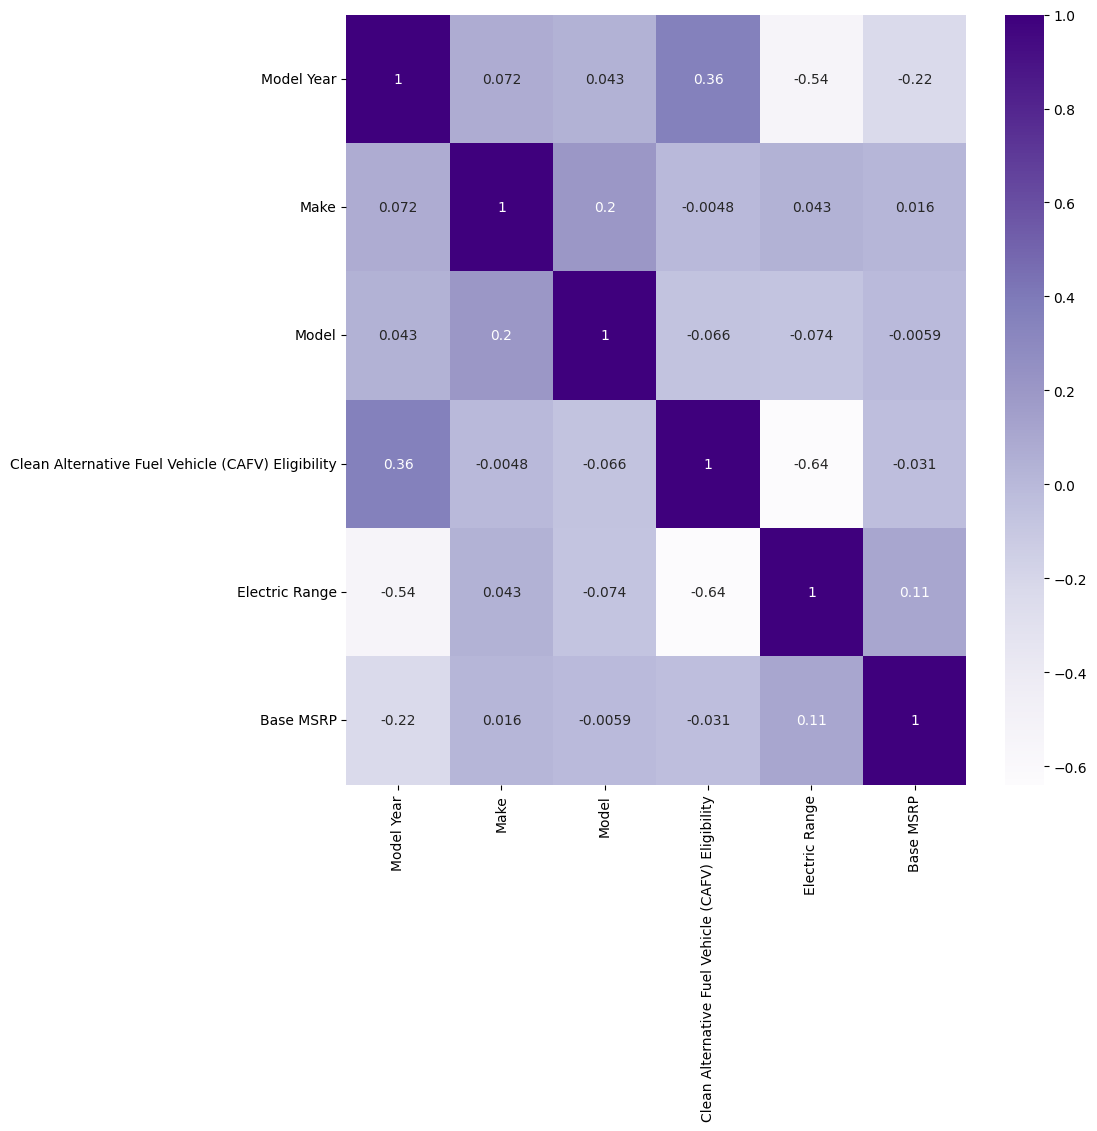

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,annot=True,cmap='Purples')

In [ ]:
y.value_counts()

,count
Electric Vehicle Type,
1,199114
0,50933


<Axes: xlabel='Electric Vehicle Type', ylabel='count'>

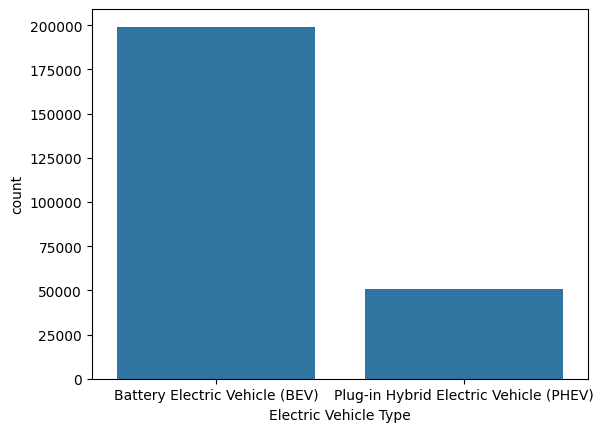

In [ ]:
sns.countplot(x='Electric Vehicle Type', data=df)

# **Models**

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42, stratify=y)

In [ ]:
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x_train, y_train)

# Logistic Regression

In [ ]:
log_reg_pipeline = ImbPipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(max_iter=1000, random_state=42))
])

In [ ]:
log_reg_pipeline.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', LogisticRegression(max_iter=1000, random_state=42))])

In [ ]:
y_pred_log = log_reg_pipeline.predict(x_test)

In [ ]:
print(accuracy_score(y_test, y_pred_log)*100)
print(classification_report(y_test, y_pred_log))

87.00459908018397
              precision    recall  f1-score   support

           0       0.86      0.44      0.58     10187
           1       0.87      0.98      0.92     39823

    accuracy                           0.87     50010
   macro avg       0.86      0.71      0.75     50010
weighted avg       0.87      0.87      0.85     50010



# Decision Tree

In [ ]:
dt_pipe = ImbPipeline([
    ('model', DecisionTreeClassifier(max_depth=10, random_state=42))
])

In [ ]:
dt_pipe.fit(x_train, y_train)

Pipeline(steps=[('model',
                 DecisionTreeClassifier(max_depth=10, random_state=42))])

In [ ]:
y_pred_dt = dt_pipe.predict(x_test)

In [ ]:
print(accuracy_score(y_test, y_pred_dt)*100)
print(classification_report(y_test, y_pred_dt))

99.99800039992002
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10187
           1       1.00      1.00      1.00     39823

    accuracy                           1.00     50010
   macro avg       1.00      1.00      1.00     50010
weighted avg       1.00      1.00      1.00     50010



# Random Forest

In [ ]:
rf_pipe = ImbPipeline([
    ('model', RandomForestClassifier(n_estimators=100,max_depth=15,random_state=42))
])

In [ ]:
rf_pipe.fit(x_train, y_train)

Pipeline(steps=[('model',
                 RandomForestClassifier(max_depth=15, random_state=42))])

In [ ]:
y_pred_rf = rf_pipe.predict(x_test)

In [ ]:
print(accuracy_score(y_test, y_pred_rf)*100)
print(classification_report(y_test, y_pred_rf))

99.99800039992002
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10187
           1       1.00      1.00      1.00     39823

    accuracy                           1.00     50010
   macro avg       1.00      1.00      1.00     50010
weighted avg       1.00      1.00      1.00     50010



In [ ]:
scores = cross_val_score(rf_pipe, x, y, cv=5, scoring='accuracy')
print("Random Forest CV Scores:", scores)
print("Average CV Score:", scores.mean())

Random Forest CV Scores: [1.         0.99996001 1.         0.99990002 0.99994001]
Average CV Score: 0.9999600073586434


In [ ]:
#Train Accuracy
train_score = rf_pipe.score(x_train, y_train)

#Cross Validation Score (Validation Accuracy)
cv_scores = cross_val_score(rf_pipe, x_train, y_train, cv=5)
cv_mean = cv_scores.mean()

print("Training Accuracy:", train_score*100)
print("Cross Validation Scores:", cv_scores*100)
print("Average CV Score:", cv_mean*100)

#Check Overfitting / Underfitting
if train_score > cv_mean + 0.05:
    print("\nOverfitting detected!")
elif cv_mean < 0.7:
    print("\nUnderfitting detected!")
else:
    print("\nModel is well-generalized")


Training Accuracy: 99.99550083234602
Cross Validation Scores: [99.9975005  99.990002   99.99250131 99.99750044 99.99250131]
Average CV Score: 99.99400111229285

Model is well-generalized
